Capstone: Snow Prediction Project
Exploratory Data Analysis

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [9]:
#load data
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data')
file_path = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data/snow_data_cleaned.csv'
snow_data = pd.read_csv(file_path)

In [13]:
snow_data.shape

(12429, 77)

In [11]:
snow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12429 entries, 0 to 12428
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  12429 non-null  object 
 1   station_name          12429 non-null  object 
 2   elevation             12429 non-null  int64  
 3   latitude              12429 non-null  float64
 4   longitude             12429 non-null  float64
 5   snowdepth             12429 non-null  float64
 6   precip_accumulation   12429 non-null  float64
 7   precip_increment      12429 non-null  float64
 8   airtemp_avg           12429 non-null  float64
 9   airtemp_max           12429 non-null  float64
 10  airtemp_min           12429 non-null  float64
 11  airtemp_obs           12429 non-null  float64
 12  soiltemp_obs          12429 non-null  float64
 13  soilmoisture_avg      12429 non-null  float64
 14  soilmoisture_max      12429 non-null  float64
 15  soilmoisture_min   

In [ ]:
#Step 1 Explore each variable

In [ ]:
Explore data by station 

In [7]:
avg_snow_depth_station= snow_data.groupby('station_name')['snowdepth'].mean()
print(avg_snow_depth_station)

station_name
Brighton             20.605911
Dry Fork             14.387521
Mill Creek Canyon     4.984615
Mill-D North         22.810619
Powder Mountain      28.857704
Name: snowdepth, dtype: float64


Powder Mtn shows a large lead in the average mean of snow depth

In [9]:
elevation_station= snow_data.groupby('station_name')['elevation'].mean()
print(elevation_station)

station_name
Brighton             8790.0
Dry Fork             7190.0
Mill Creek Canyon    6960.0
Mill-D North         8940.0
Powder Mountain      8490.0
Name: elevation, dtype: float64


In [11]:
avg_precip_station= snow_data.groupby('station_name')['precip_accumulation'].mean()
print(avg_precip_station)

station_name
Brighton             23.108101
Dry Fork             17.297126
Mill Creek Canyon     3.465128
Mill-D North         23.188314
Powder Mountain      24.607311
Name: precip_accumulation, dtype: float64


Pwder Mtn again has the similar precipitation but averagely more snow depth, could another feature or variable interaction be the cause? 

In [43]:
avg_airtemp_station= snow_data.groupby('station_name')['airtemp_obs'].mean()
print(avg_airtemp_station)

station_name
Brighton             36.326683
Dry Fork             38.754625
Mill Creek Canyon    41.554359
Mill-D North         37.757334
Powder Mountain      39.010849
Name: airtemp_obs, dtype: float64


The average air temperatures are similar: could indicate consistency in snowfall drivers, maybe predictability of snow depth, and influence of non-temperature factors.

In [32]:
#Location data of snow depth by each station
station_description = snow_data.groupby('station_name')['snowdepth'].describe()

mode = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: x.mode().iloc[0])
iqr = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

station_description['mode'] = mode
station_description['iqr'] = iqr

print(station_description)

print()
print(f"Spread Statistics:")
#Spread Statistics 
std_dev = snow_data.groupby('station_name')['snowdepth'].std()
variance = snow_data.groupby('station_name')['snowdepth'].var()
value_range = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: x.max() - x.min())
iqr_range = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
print()
print(f"Standard Devivation of Snow Depth for each Station: {std_dev}")
print()
print(f"Variance of Snow Depth for each Station: {variance}")
print()
print(f"Value Range of Snow Depth for each Station: {value_range}")
print()
print(f"Interqurtile Range Snow Depth for each Station: {iqr_range}")

print()
print()
print(f"Shape Statistics:")
#Shape Statistics 
skewness = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: x.skew())
kurtosis = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: x.kurt())

print()
print(f"Skewness of Snowdepth for each Station:")
print(skewness)
print()
print(f"Kurtosis of Snowdepth for each Station:")
print(kurtosis)
#Describes the shape of distribution's tails in relation to its overall shape


                    count       mean        std  min  25%  50%   75%    max  \
station_name                                                                  
Brighton           3654.0  20.605911  25.590131  0.0  0.0  6.0  37.0  122.0   
Dry Fork           3654.0  14.387521  18.978090  0.0  0.0  1.0  27.0   98.0   
Mill Creek Canyon   195.0   4.984615   8.214569  0.0  0.0  0.0   8.0   29.0   
Mill-D North       3654.0  22.810619  28.538768  0.0  0.0  7.0  41.0  155.0   
Powder Mountain    1272.0  28.857704  35.025822  0.0  0.0  9.0  51.0  155.0   

                   mode   iqr  
station_name                   
Brighton            0.0  37.0  
Dry Fork            0.0  27.0  
Mill Creek Canyon   0.0   8.0  
Mill-D North        0.0  41.0  
Powder Mountain     0.0  51.0  

Spread Statistics:

Standard Devivation of Snow Depth for each Station: station_name
Brighton             25.590131
Dry Fork             18.978090
Mill Creek Canyon     8.214569
Mill-D North         28.538768
Powder Mount

Issues with the dataset : 
-Shape: Stations like Brighton, Dry Fork, and Mill-D North have significantly more data points compared to Mill Creek Canyon and Powder Mountain. This might affect the reliability of statistical analyses for smaller datasets like Mill Creek Canyon.
-Mode: The mode for snow depth is 0.0 for all stations, indicating that no snow (or very low snow) is the most frequent observation at each station
    Could possibily use only winter months since the summer months of no snow depth could skew the data. 

Spread Statistics: 
-Std and variance: Powder Mountain and Mill-D North show the highest variability in snow depth, suggesting these locations experience more fluctuations. On the other side, Mill Creek Canyon indicates much lower variability.
-Range: Mill-D North and Powder Mountain have the largest range of snow depths (155.0), reflecting high extremes. Mill Creek Canyon has the smallest range (29.0).
-IQRR: Powder Mountain and Mill-D North also show higher IQR values, signaling greater spread in middle-range snow depth values. Mill Creek Canyon remains the least varied.

Shape statistics:
-Skewness: All stations have positive skewness, meaning snow depth data is right-skewed (more frequent low values and fewer high values).   Should look at isolating winter months!
-Kurtosis: Most stations produced kurtosis near or below zero, with the exception of Mill-D North (1.25). MOst stations have a normal distribution of snow depth distributions, however some stations might have outlier-prone behavior perhaps Mill-D.

In [ ]:
#Exploring data by date (month, year)

In [28]:
snow_data['date'] = pd.to_datetime(snow_data['date'])
snow_data['month'] = snow_data['date'].dt.month
snow_data['year'] = snow_data['date'].dt.year

In [34]:
#Location data of snow depth by month and year
month_description = snow_data.groupby('month')['snowdepth'].describe()

mode = snow_data.groupby('month')['snowdepth'].apply(lambda x: x.mode().iloc[0])
iqr = snow_data.groupby('month')['snowdepth'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

month_description['mode'] = mode
month_description['iqr'] = iqr
print("Summary statistics of Snow Depth for Months:")
print(month_description)
print()
year_description = snow_data.groupby('year')['snowdepth'].describe()

mode = snow_data.groupby('year')['snowdepth'].apply(lambda x: x.mode().iloc[0])
iqr = snow_data.groupby('year')['snowdepth'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

year_description['mode'] = mode
year_description['iqr'] = iqr
print("Summary statistics of Snow Depth for Years:")
print(year_description)


#Shape Statistics for Year, Month
skewness_month = snow_data.groupby('month')['snowdepth'].apply(lambda x: x.skew())
kurtosis_month = snow_data.groupby('month')['snowdepth'].apply(lambda x: x.kurt())
print()
print()
print(f"Skewness of Snowdepth for Month:")
print(skewness_month)
print()
print(f"Kurtosis of Snowdepth for Month:")
print(kurtosis_month)
print()

skewness_year = snow_data.groupby('year')['snowdepth'].apply(lambda x: x.skew())
kurtosis_year = snow_data.groupby('year')['snowdepth'].apply(lambda x: x.kurt())
print()
print(f"Skewness of Snowdepth for Year:")
print(skewness_year)
print()
print(f"Kurtosis of Snowdepth for Year:")
print(kurtosis_year)

Summary statistics of Snow Depth for Months:
        count       mean        std   min   25%   50%   75%    max  mode   iqr
month                                                                         
1      1028.0  40.481518  16.200564  13.0  30.0  38.0  50.0   92.0  35.0  20.0
2       934.0  50.745182  17.483581  16.0  37.0  48.5  63.0  105.0  34.0  26.0
3      1023.0  57.557185  22.683787  13.0  42.0  52.0  68.0  147.0  57.0  26.0
4       990.0  47.603030  30.713869   0.0  27.0  43.5  61.0  155.0   0.0  34.0
5      1023.0  18.032258  24.259360   0.0   0.0   3.0  32.0  102.0   0.0  32.0
6      1000.0   1.002000   4.602954   0.0   0.0   0.0   0.0   36.0   0.0   0.0
7      1076.0   0.000000   0.000000   0.0   0.0   0.0   0.0    0.0   0.0   0.0
8      1085.0   0.000000   0.000000   0.0   0.0   0.0   0.0    0.0   0.0   0.0
9      1050.0   0.071429   0.493661   0.0   0.0   0.0   0.0    8.0   0.0   0.0
10     1085.0   1.393548   2.895625   0.0   0.0   0.0   1.0   17.0   0.0   1.0
11     

Initial Thoughts:
-Count: irregular shape of months and year: 
    Strageties to deal with that??
-Months to pontentially disregard in winter month analysis due to low to zero mean values : 6-10

-Maybe dissecting 2025 data out of year analysis 
-The month of september (9) indicates a distribution heavily skewed and not generally a normal distribution. Hevily influenced by a small number of extreme values. Unlikely september snow storms?



In [38]:
#Remove 2025 data 
snow_data = snow_data[snow_data['year'] != 2025]


In [36]:


#Explore winter month data by year 
winter_months = [11, 12, 1, 2, 3, 4, 5]
winter_data = snow_data[snow_data['month'].isin(winter_months)]

seasonal_yearly_summary = winter_data.groupby('year')['snowdepth'].describe()
seasonal_monthly_summary = winter_data.groupby('month')['snowdepth'].describe()
print("Summary statistics of Snow Depth for Winter Months by Year:")
print(seasonal_yearly_summary)
print()
print(seasonal_monthly_summary)
print()

skewness_seasonal = winter_data.groupby('month')['snowdepth'].apply(lambda x: x.skew())
kurtosis_seasonal = winter_data.groupby('month')['snowdepth'].apply(lambda x: x.kurt())


skewness_seasonal_year = winter_data.groupby('year')['snowdepth'].apply(lambda x: x.skew())
kurtosis_seasonal_year = winter_data.groupby('year')['snowdepth'].apply(lambda x: x.kurt())

print(f"Skewness of Snowdepth for Winter Seasons:")
print(skewness_seasonal)
print()
print(f"Kurtosis of Snowdepth for Winter Seasons:")
print(kurtosis_seasonal)
print()

print(f"Skewness of Snowdepth for Winter Seasons by Year:")
print(skewness_seasonal_year)
print()
print(f"Kurtosis of Snowdepth for Winter Seasons by Year:")
print(kurtosis_seasonal_year)

Summary statistics of Snow Depth for Winter Months by Year:
      count       mean        std   min   25%   50%    75%    max
year                                                             
2015  636.0  19.808176  15.106061   0.0   5.0  19.0  34.00   50.0
2016  639.0  29.694836  18.225576   0.0  15.5  36.0  43.00   63.0
2017  636.0  35.971698  26.136874   0.0   8.0  40.0  59.00   92.0
2018  636.0  22.015723  15.439995   0.0   8.0  22.0  33.00   58.0
2019  636.0  43.809748  24.897901   0.0  28.0  43.0  65.25   91.0
2020  639.0  33.021909  23.409256   0.0   8.0  40.0  54.00   75.0
2021  697.0  22.347202  18.650135   0.0   4.0  20.0  39.00   68.0
2022  848.0  30.794811  14.414356   0.0  23.0  33.0  41.00   64.0
2023  848.0  59.163915  39.195605   0.0  23.0  63.0  88.00  155.0
2024  913.0  40.371303  25.952536   0.0  18.0  39.0  60.00  104.0
2025    5.0  33.800000   8.012490  26.0  28.0  32.0  37.00   46.0

        count       mean        std   min   25%   50%   75%    max
month         

In [40]:
# How to deal with varying counts per year 
    #normalize data by year?
    #Downsample larger years
    #Does it matter if we are focusing on proportions or rates??
    #Separate analysis per year
    #time series analysis 


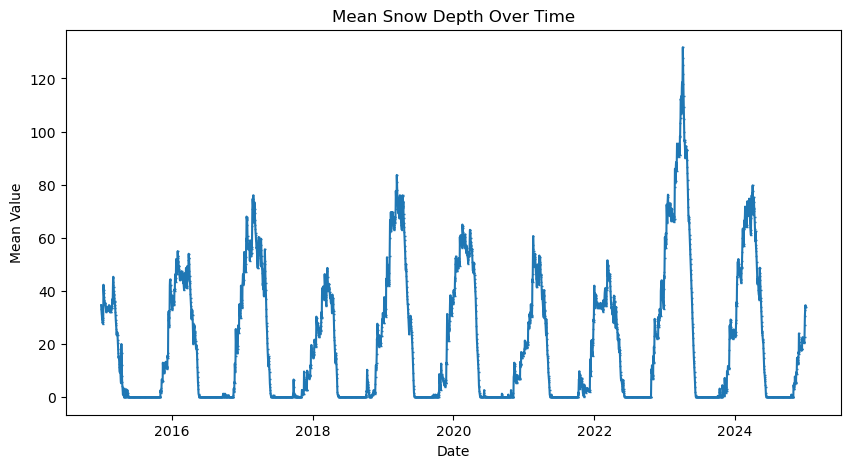

In [27]:
#Time Series Plot

time_series_mean = snow_data.groupby('date')['snowdepth'].mean()
plt.figure(figsize=(10, 5))
plt.plot(time_series_mean, marker='_', markersize= 1)
plt.title('Mean Snow Depth Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.show()

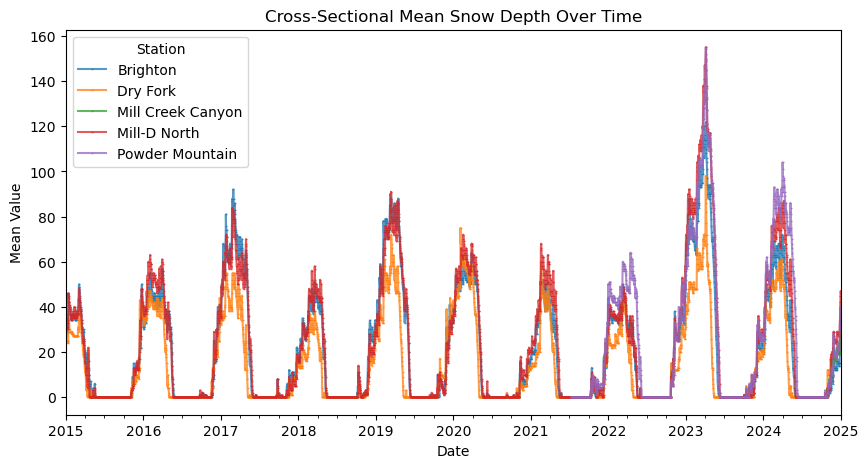

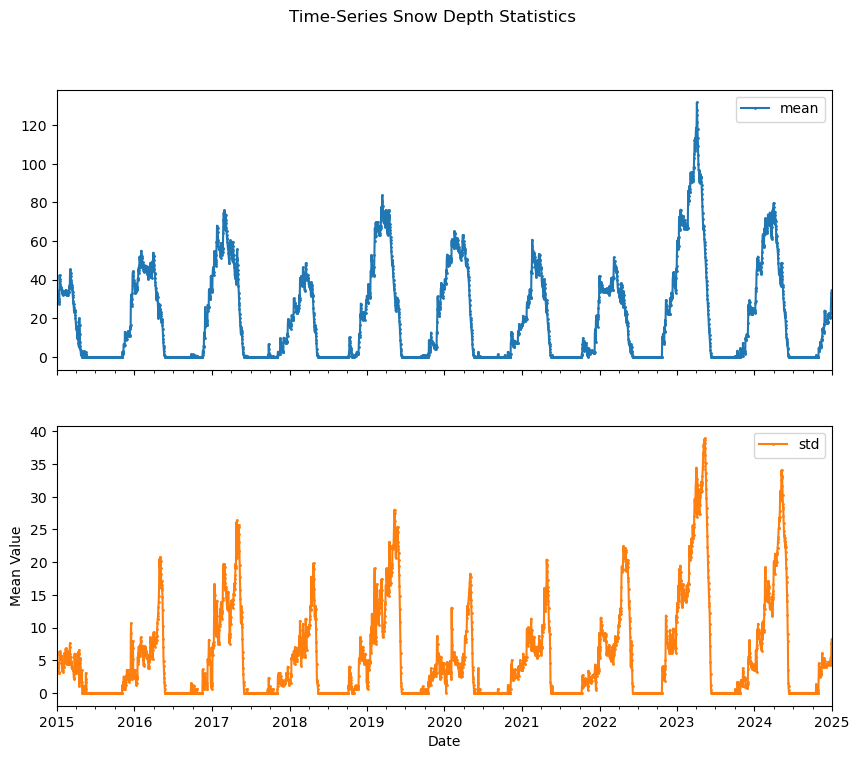

In [29]:
#Panel Data Plot

# Cross-sectional summary statistics over time
cross_sectional_stats = snow_data.groupby(['date', 'station_name'])['snowdepth'].mean().unstack()
cross_sectional_stats.plot(figsize=(10, 5), marker='_', markersize =1, alpha = 0.75)
plt.title('Cross-Sectional Mean Snow Depth Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.legend(title='Station')
plt.show()

# Time-series statistics across the population
time_series_stats = snow_data.groupby('date')['snowdepth'].agg(['mean', 'std'])
time_series_stats.plot(subplots=True, figsize=(10, 8), marker='o', markersize = 1)
plt.suptitle('Time-Series Snow Depth Statistics')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.show()


Using snow_data to display entire time series^^^

In [ ]:
#Step two: Exploring relationships between each variable and the target 

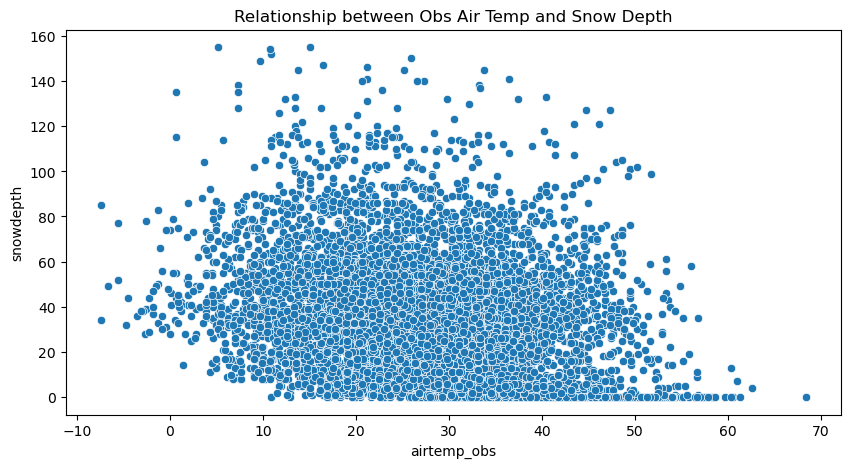

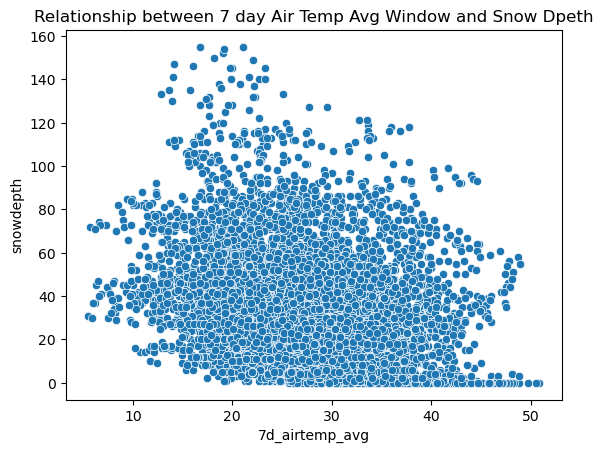

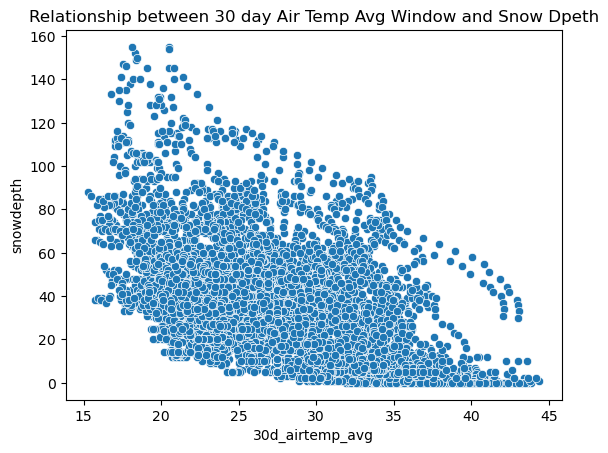

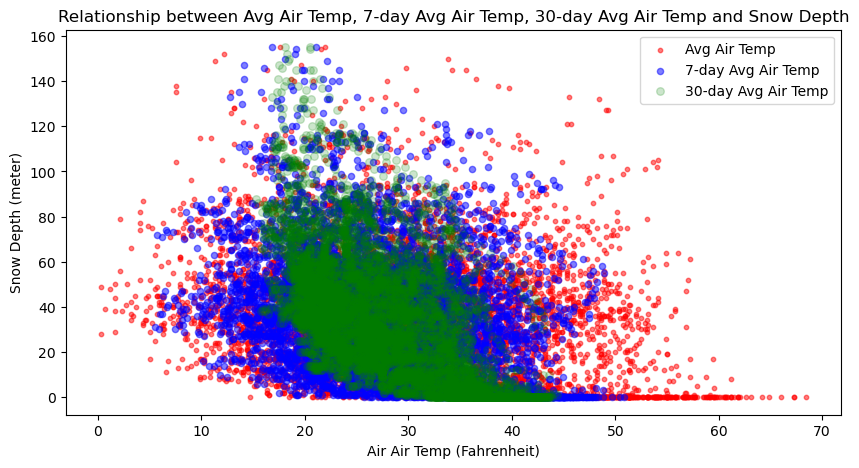

In [44]:
#Scatter plots 

#
plt.figure(figsize=(10, 5))
sns.scatterplot(x='airtemp_obs', y='snowdepth', data=winter_data)
plt.title('Relationship between Obs Air Temp and Snow Depth')
plt.show()

sns.scatterplot(x='7d_airtemp_avg', y='snowdepth', data=winter_data)
plt.title('Relationship between 7 day Air Temp Avg Window and Snow Dpeth')
plt.show()

sns.scatterplot(x='30d_airtemp_avg', y='snowdepth', data=winter_data)
plt.title('Relationship between 30 day Air Temp Avg Window and Snow Dpeth')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(winter_data['airtemp_avg'], winter_data['snowdepth'], color ='red', label='Avg Air Temp', s=10, alpha=0.5)
plt.scatter(winter_data['7d_airtemp_avg'], winter_data['snowdepth'], color ='blue', label='7-day Avg Air Temp', s=20, alpha=0.5)
plt.scatter(winter_data['30d_airtemp_avg'], winter_data['snowdepth'], color ='green', label='30-day Avg Air Temp', s=30, alpha=0.2)
plt.xlabel('Air Air Temp (Fahrenheit)')
plt.ylabel('Snow Depth (meter)')
plt.title('Relationship between Avg Air Temp, 7-day Avg Air Temp, 30-day Avg Air Temp and Snow Depth')
plt.legend()
plt.show()


In [ ]:
#What windows are relevant and should be considered? 

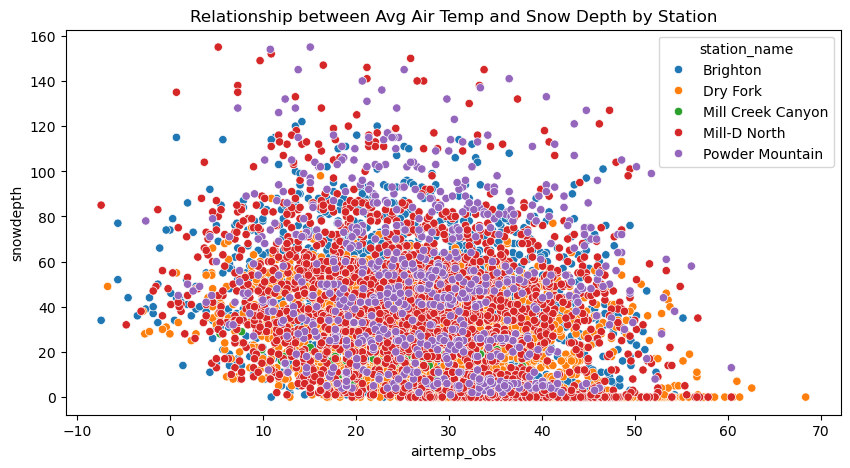

In [46]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='airtemp_obs', y='snowdepth', hue = 'station_name', data=winter_data)
plt.title('Relationship between Avg Air Temp and Snow Depth by Station')
plt.show()


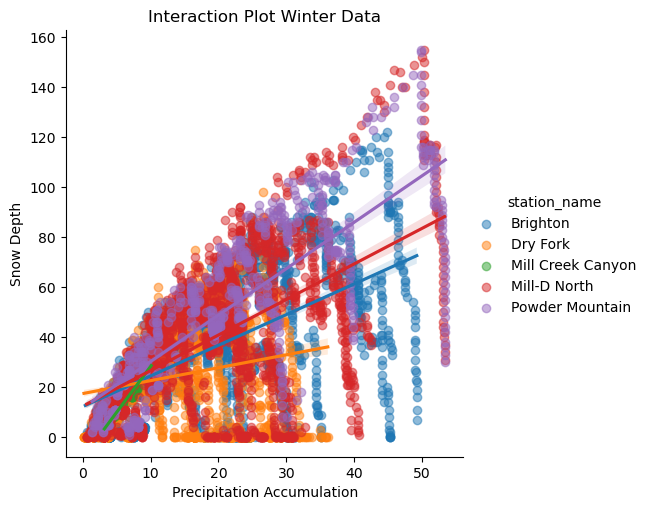

In [52]:
sns.lmplot(x='precip_accumulation', y='snowdepth', hue='station_name', data=winter_data, scatter_kws={'alpha': 0.5})
plt.xlabel('Precipitation Accumulation')
plt.ylabel('Snow Depth')
plt.title('Interaction Plot Winter Data')
plt.show()

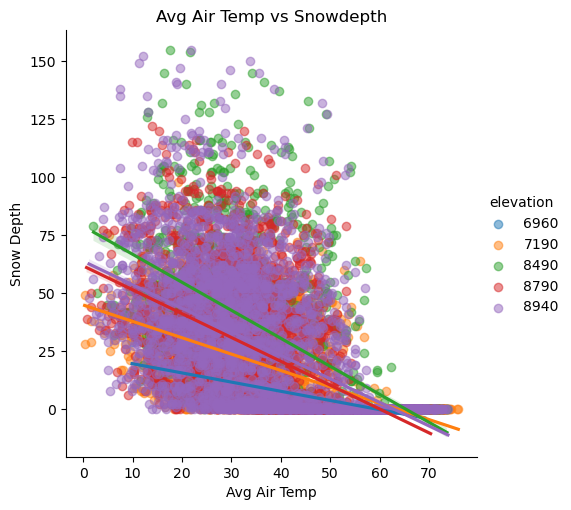

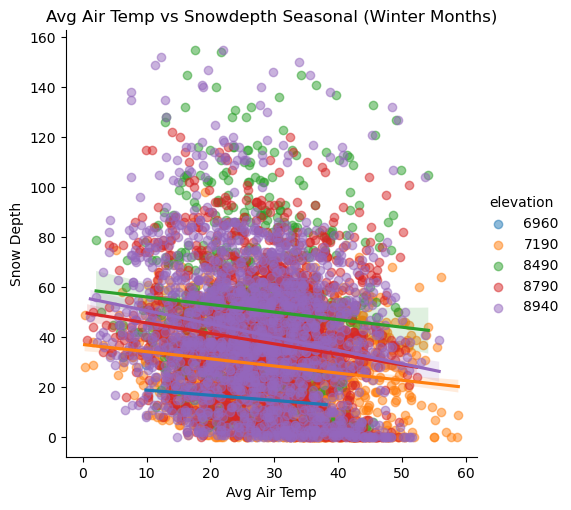

In [37]:
sns.lmplot(x='airtemp_avg', y='snowdepth', hue='elevation', data=snow_data, scatter_kws={'alpha': 0.5})
plt.xlabel('Avg Air Temp')
plt.ylabel('Snow Depth')
plt.title('Avg Air Temp vs Snowdepth')
plt.show()

sns.lmplot(x='airtemp_avg', y='snowdepth', hue='elevation', data=winter_data, scatter_kws={'alpha': 0.5})
plt.xlabel('Avg Air Temp')
plt.ylabel('Snow Depth')
plt.title('Avg Air Temp vs Snowdepth Seasonal (Winter Months)')
plt.show()

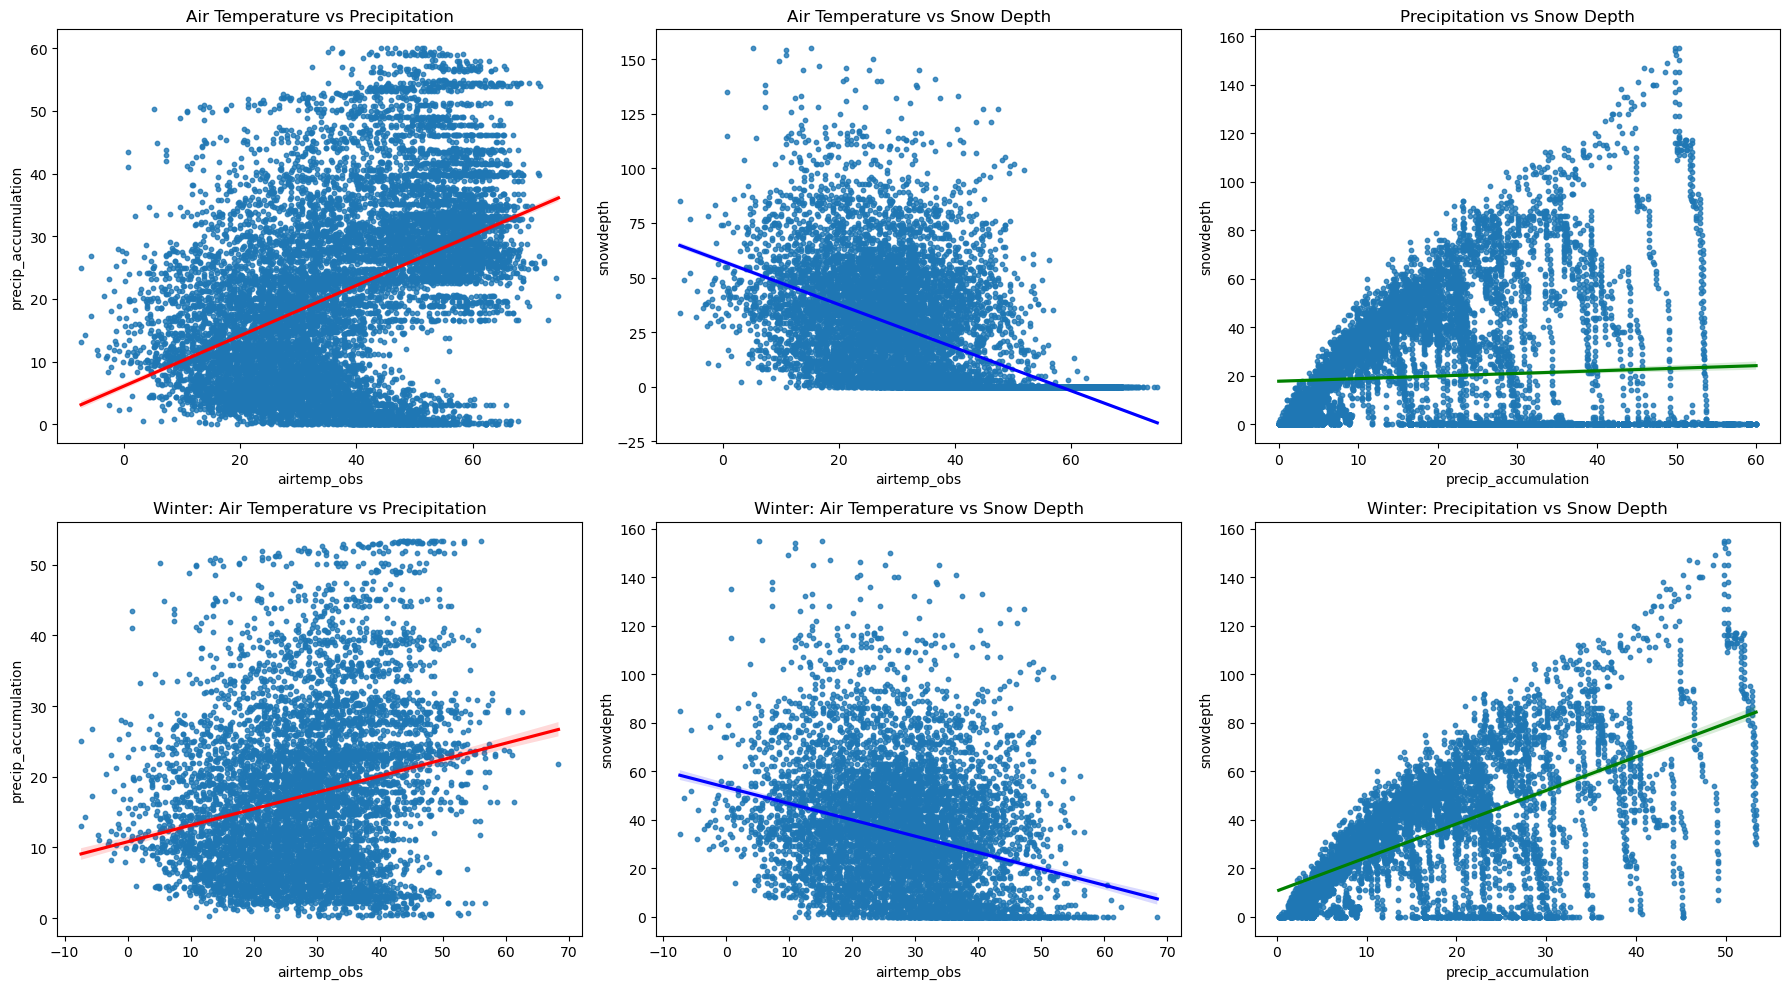

In [144]:
#Step three:  Assessing  interactions  between  variables  
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows and 3 columns

# Scatter plot between Air Temperature and Precipitation
sns.regplot(x='airtemp_obs', y='precip_accumulation', data=snow_data, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=axs[0, 0])
axs[0, 0].set_title('Air Temperature vs Precipitation')

# Scatter plot between Air Temperature and Snow Depth
sns.regplot(x='airtemp_obs', y='snowdepth', data=snow_data, scatter_kws={'s':10}, line_kws={'color':'blue'}, ax=axs[0, 1])
axs[0, 1].set_title('Air Temperature vs Snow Depth')

# Scatter plot between Precipitation and Snow Depth
sns.regplot(x='precip_accumulation', y='snowdepth', data=snow_data, scatter_kws={'s':10}, line_kws={'color':'green'}, ax=axs[0, 2])
axs[0, 2].set_title('Precipitation vs Snow Depth')

# Scatter plots with only winter months
sns.regplot(x='airtemp_obs', y='precip_accumulation', data=winter_data, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=axs[1, 0])
axs[1, 0].set_title('Winter: Air Temperature vs Precipitation')

# Scatter plot between Air Temperature and Snow Depth
sns.regplot(x='airtemp_obs', y='snowdepth', data=winter_data, scatter_kws={'s':10}, line_kws={'color':'blue'}, ax=axs[1, 1])
axs[1, 1].set_title('Winter: Air Temperature vs Snow Depth')

# Scatter plot between Precipitation and Snow Depth
sns.regplot(x='precip_accumulation', y='snowdepth', data=winter_data, scatter_kws={'s':10}, line_kws={'color':'green'}, ax=axs[1, 2])
axs[1, 2].set_title('Winter: Precipitation vs Snow Depth')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


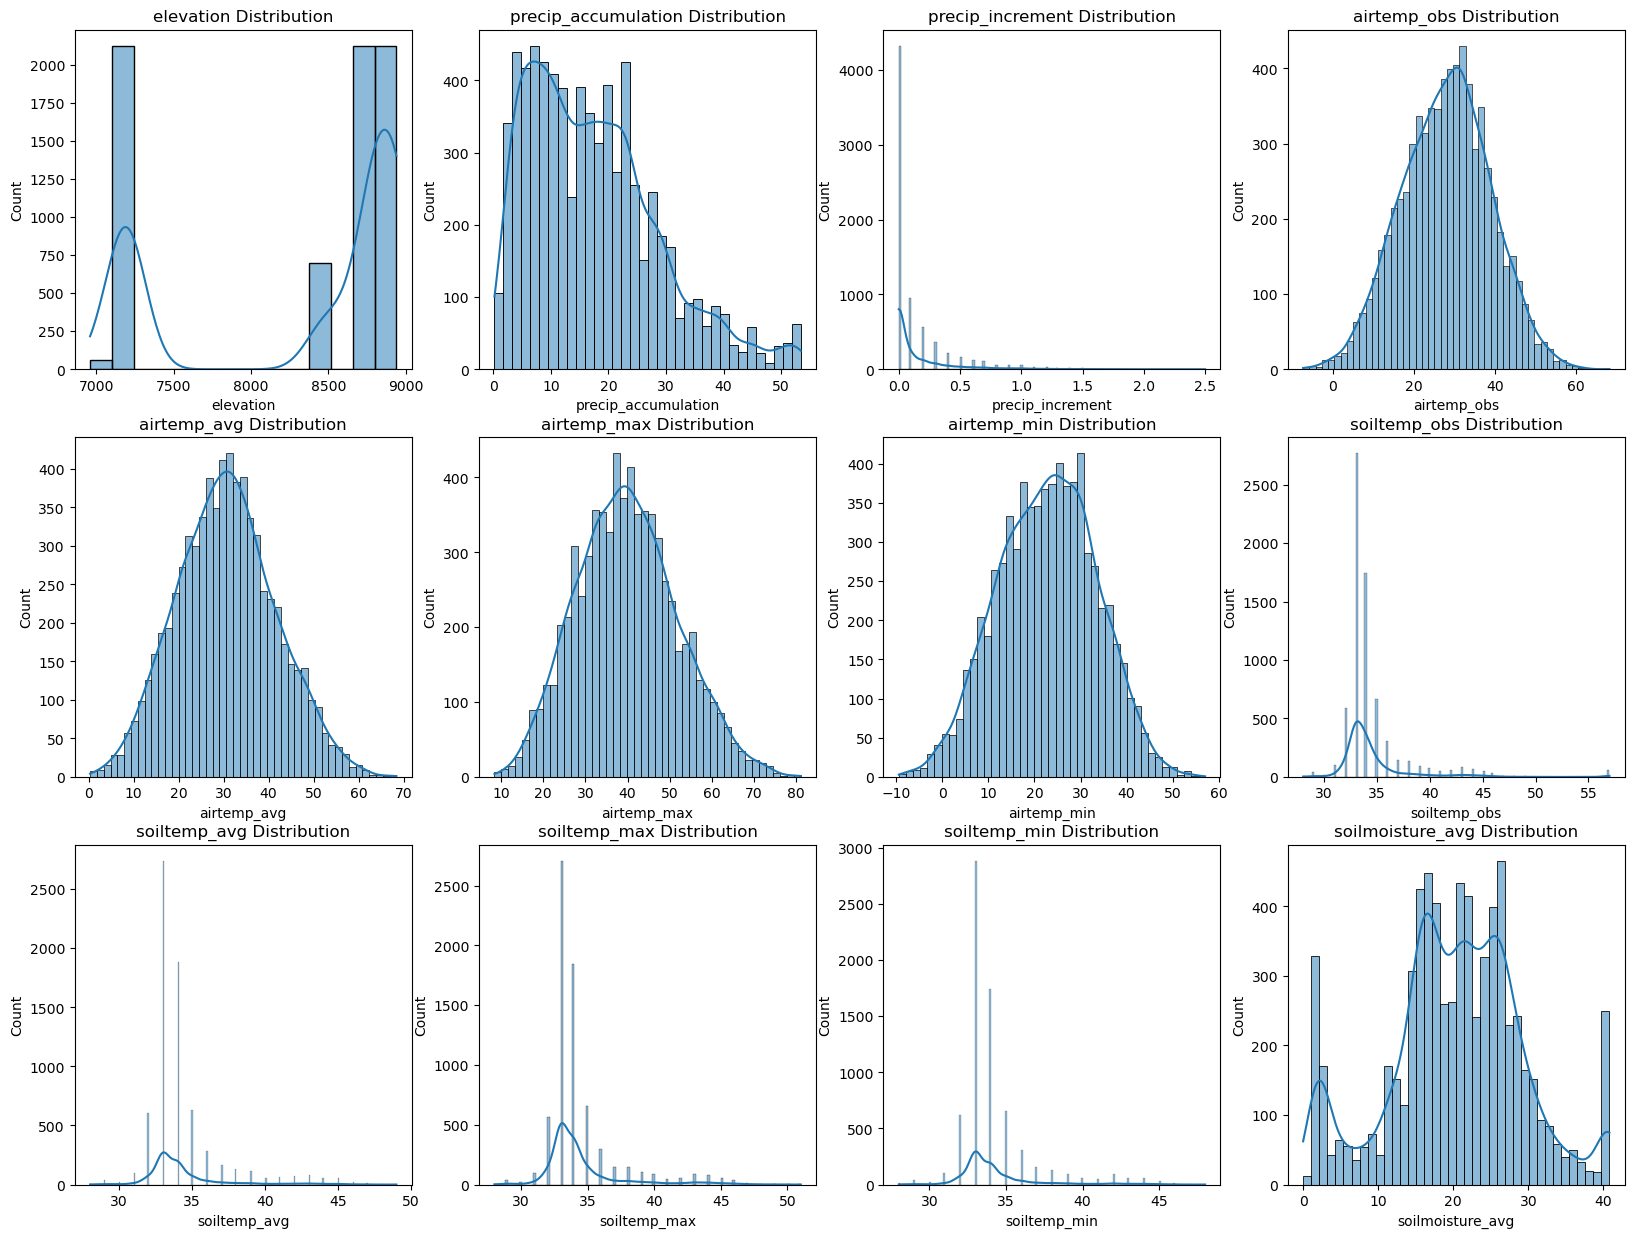

In [56]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
features = ['elevation', 'precip_accumulation', 'precip_increment', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg']

for i, feature in enumerate(features):
    ax = axs[i // 4, i % 4]  # Calculate subplot location
    sns.histplot(winter_data[feature], ax=ax, kde=True)  
    ax.set_title(f'{feature} Distribution')

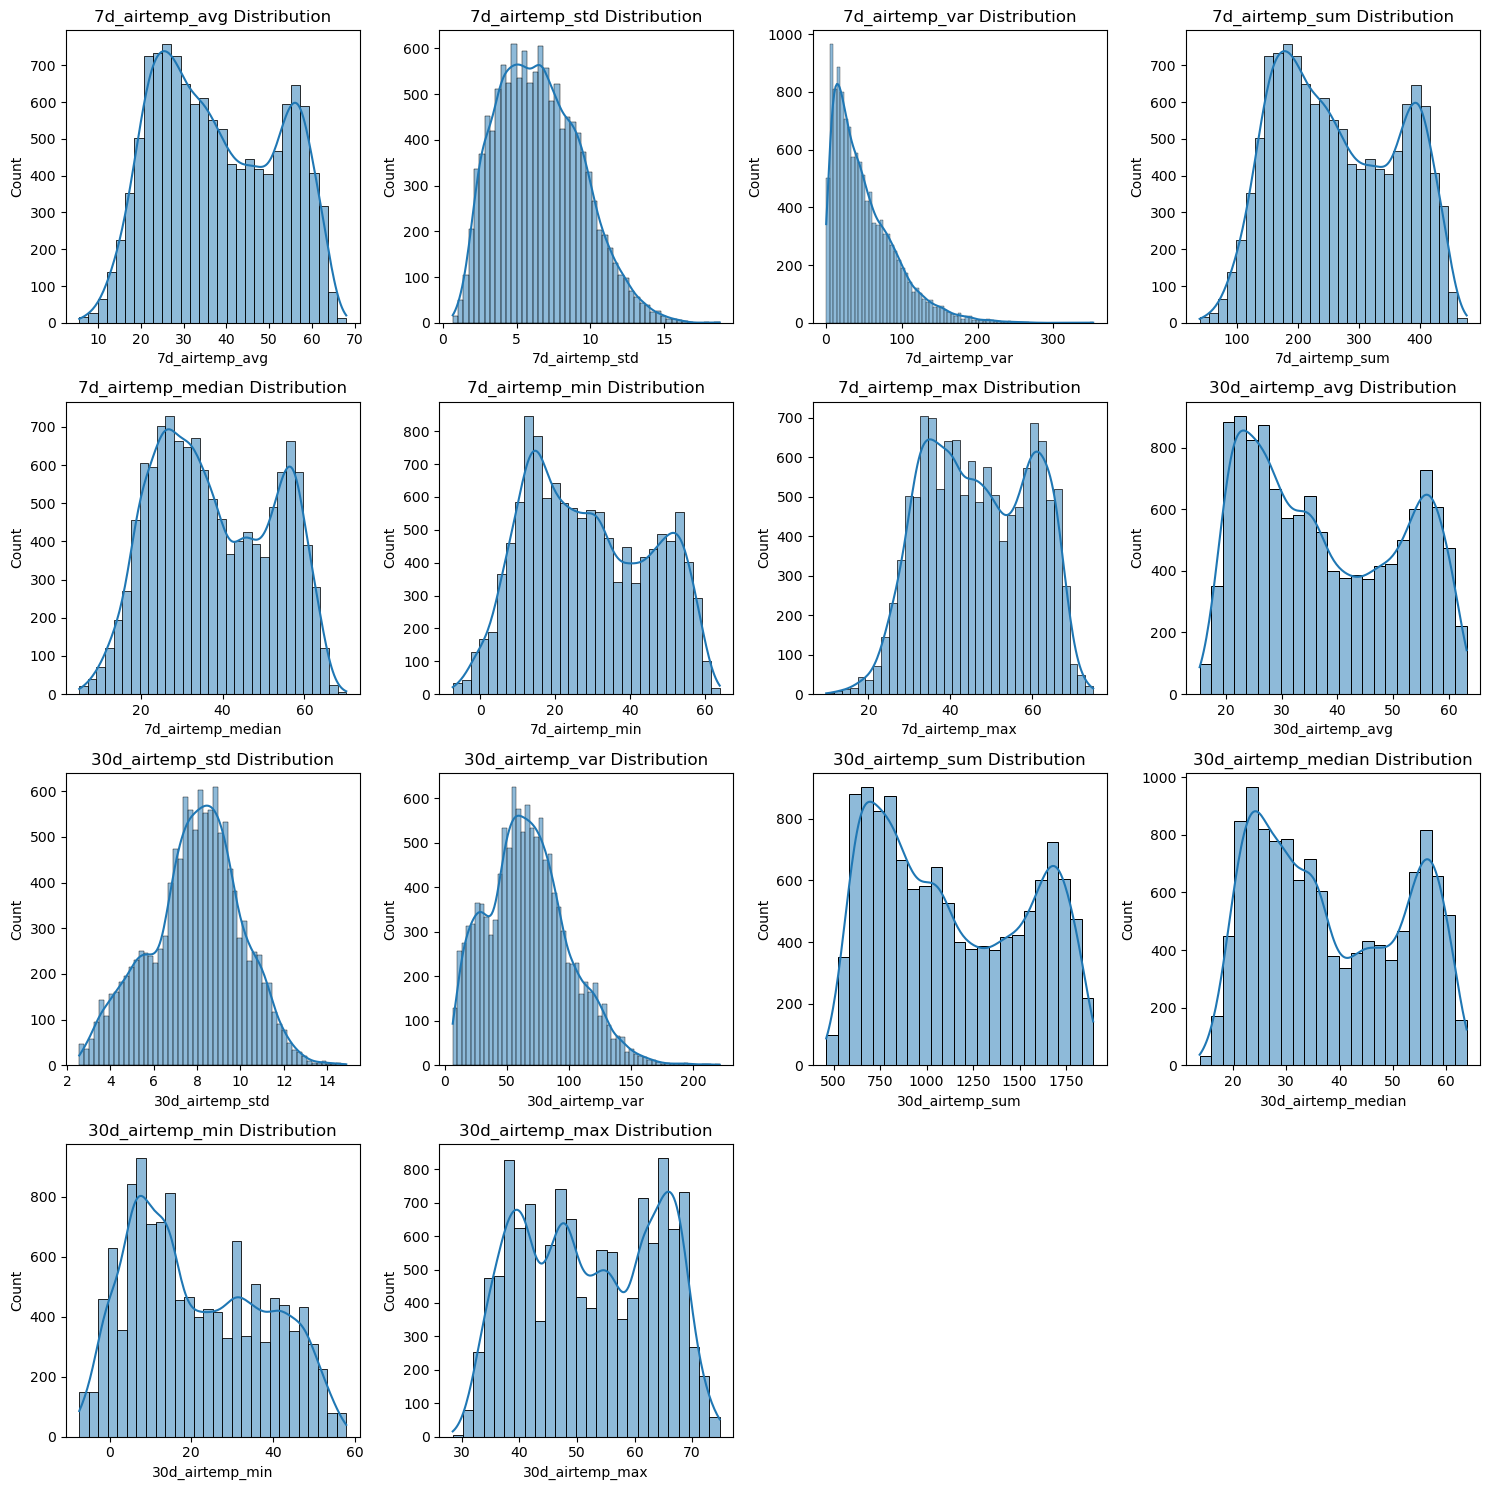

In [64]:
#Distribution for Air Temperature Statistics 7-day and 30-day windows

fig, axs = plt.subplots(4, 4, figsize=(15, 15))
additional_features = ['7d_airtemp_avg', '7d_airtemp_std', '7d_airtemp_var', '7d_airtemp_sum', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max', '30d_airtemp_avg', '30d_airtemp_std', '30d_airtemp_var', '30d_airtemp_sum', '30d_airtemp_median', '30d_airtemp_min', '30d_airtemp_max' ]

axs= axs.flatten()

for i, feature in enumerate(additional_features):
    ax = axs[i]  # Calculate subplot location
    sns.histplot(winter_data[feature], ax=ax, kde=True)  
    ax.set_title(f'{feature} Distribution')

for j in range(i +1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

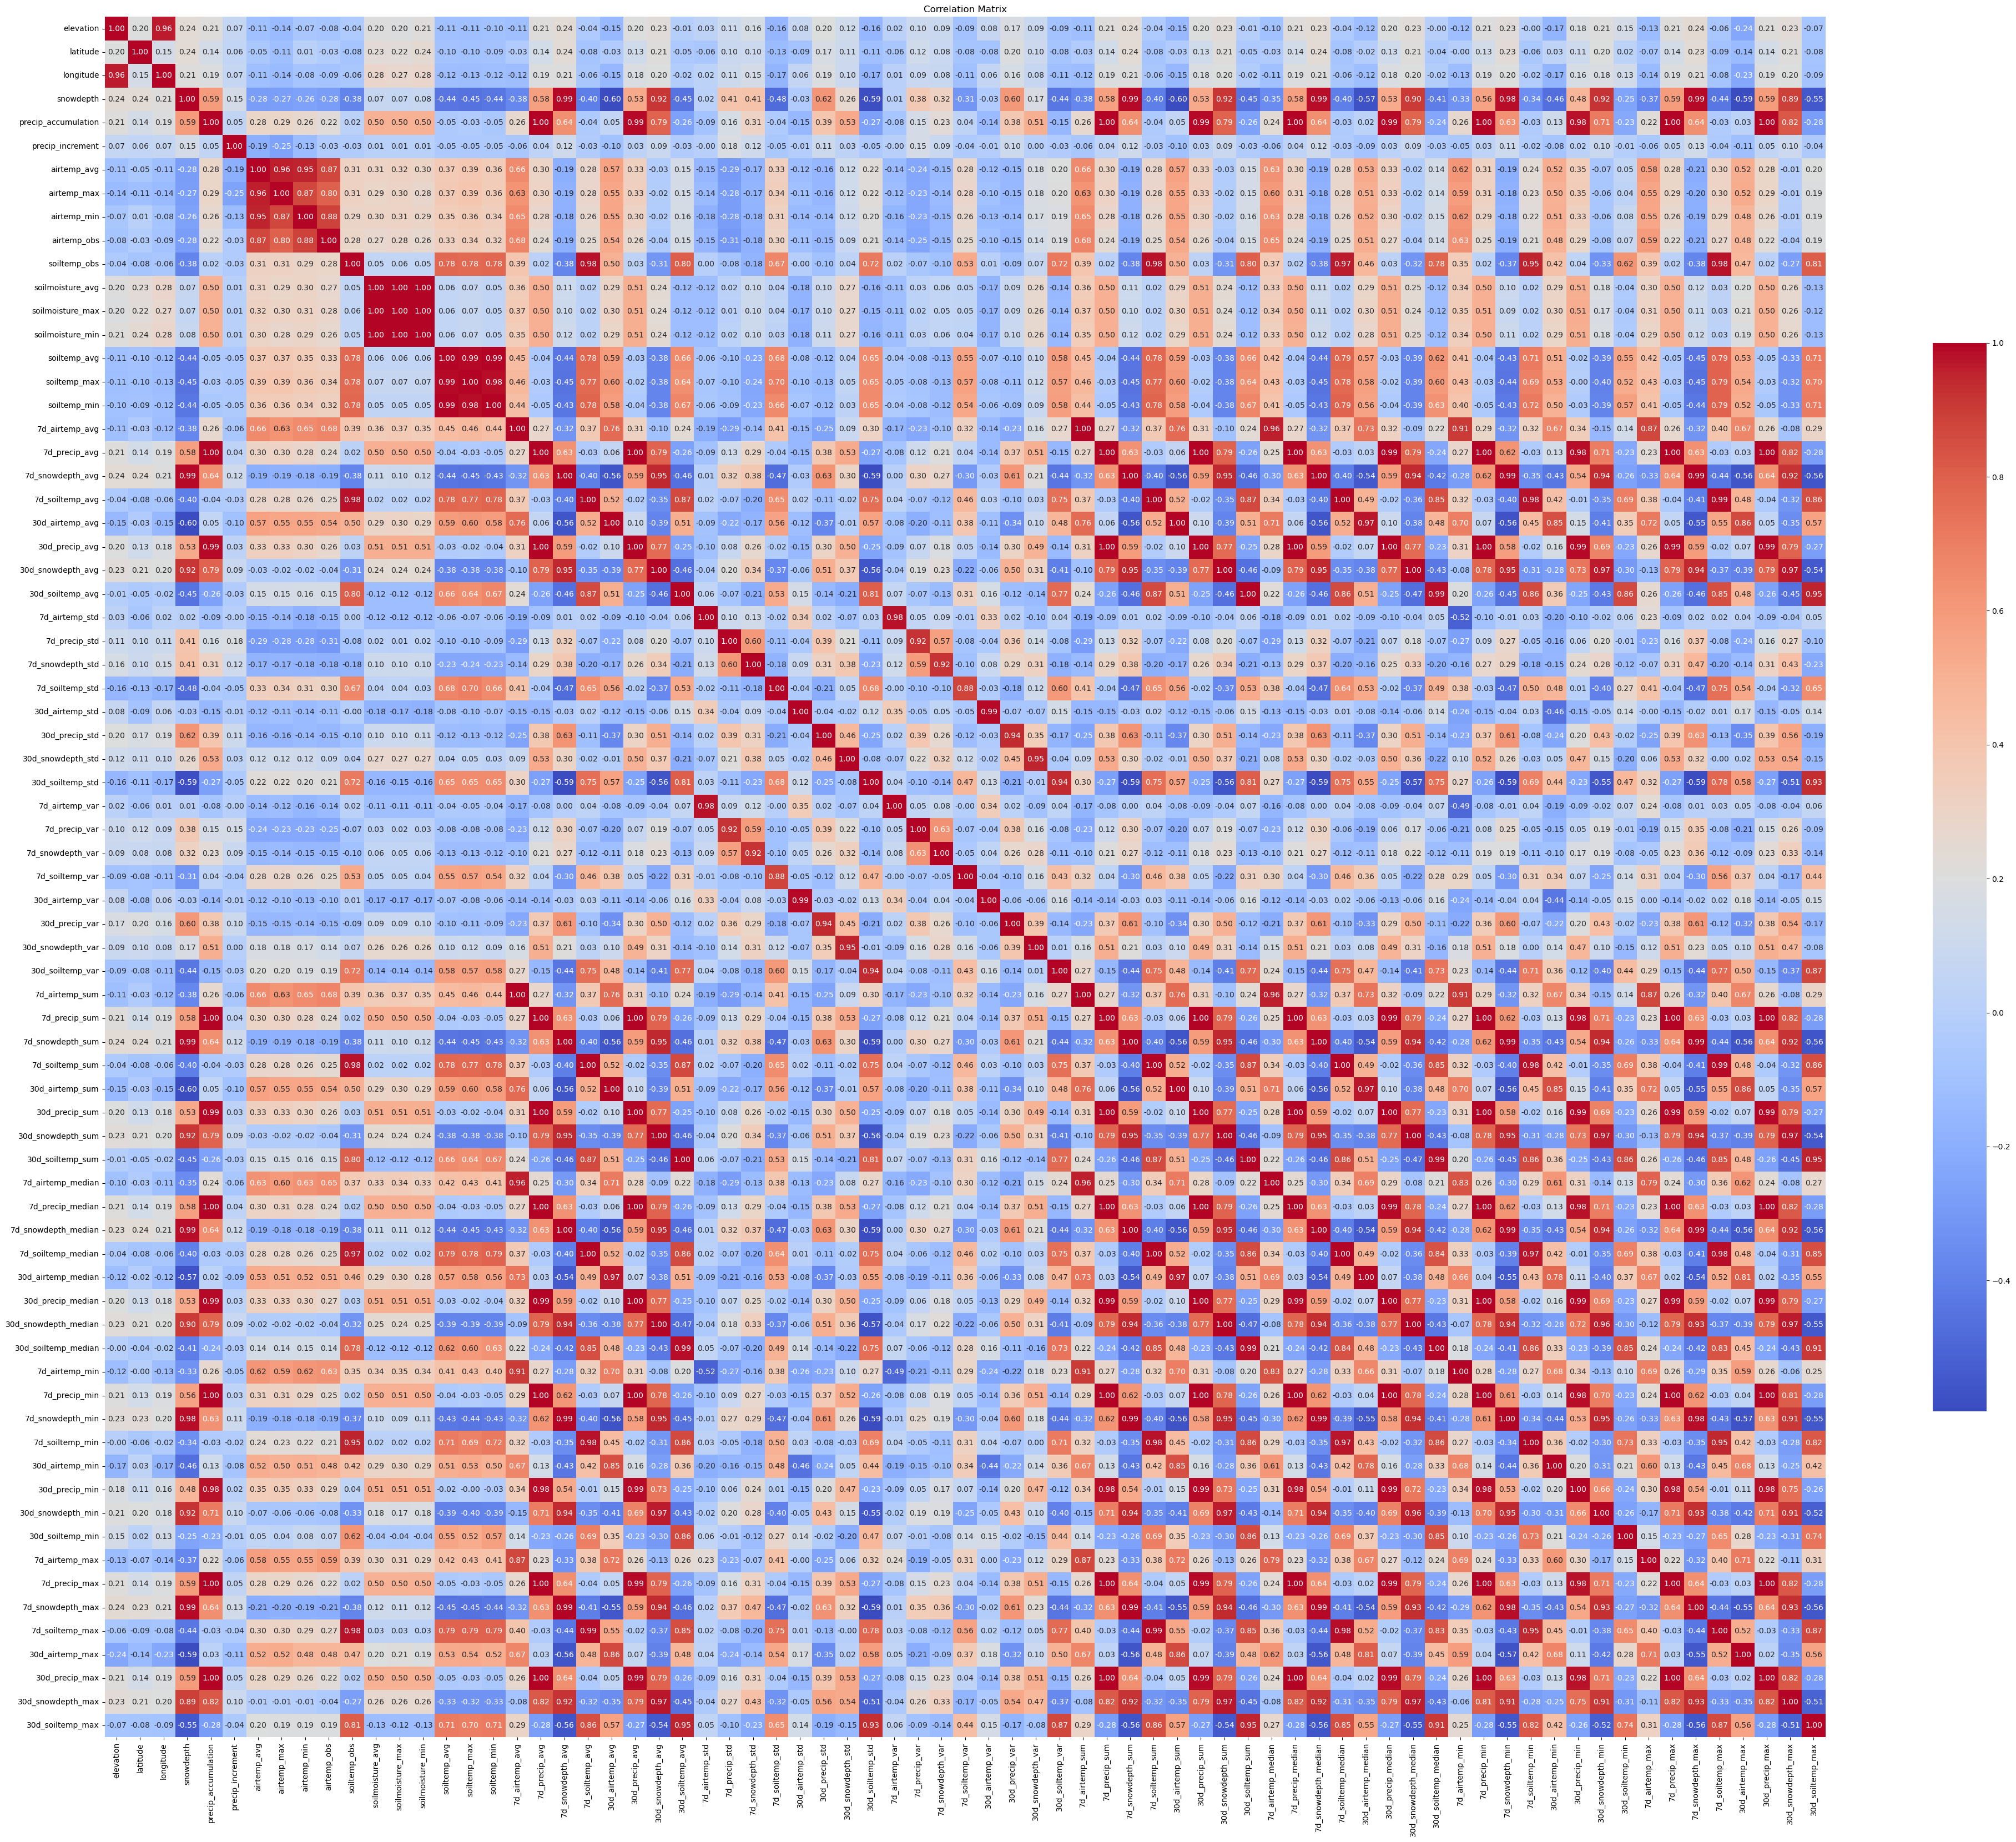

elevation  latitude  longitude  snowdepth  \
elevation                  1.00      0.20       0.96       0.24   
latitude                   0.20      1.00       0.15       0.24   
longitude                  0.96      0.15       1.00       0.21   
snowdepth                  0.24      0.24       0.21       1.00   
precip_accumulation        0.21      0.14       0.19       0.59   
precip_increment           0.07      0.06       0.07       0.15   
airtemp_avg               -0.11     -0.05      -0.11      -0.28   
airtemp_max               -0.14     -0.11      -0.14      -0.27   
airtemp_min               -0.07      0.01      -0.08      -0.26   
airtemp_obs               -0.08     -0.03      -0.09      -0.28   
soiltemp_obs              -0.04     -0.08      -0.06      -0.38   
soilmoisture_avg           0.20      0.23       0.28       0.07   
soilmoisture_max           0.20      0.22       0.27       0.07   
soilmoisture_min           0.21      0.24       0.28       0.08   
soiltemp_avg              -0.11     -0.10      -0.12      -0.44   
soiltemp_max              -0.11     -0.10      -0.13      -0.45   
soiltemp_min              -0.10     -0.09      -0.12      -0.44   
7d_airtemp_avg            -0.11     -0.03      -0.12      -0.38   
7d_precip_avg              0.21      0.14       0.19       0.58   
7d_snowdepth_avg           0.24      0.24       0.21       0.99   
7d_soiltemp_avg           -0.04     -0.08      -0.06      -0.40   
30d_airtemp_avg           -0.15     -0.03      -0.15      -0.60   
30d_precip_avg             0.20      0.13       0.18       0.53   
30d_snowdepth_avg          0.23      0.21       0.20       0.92   
30d_soiltemp_avg          -0.01     -0.05      -0.02      -0.45   
7d_airtemp_std             0.03     -0.06       0.02       0.02   
7d_precip_std              0.11      0.10       0.11       0.41   
7d_snowdepth_std           0.16      0.10       0.15       0.41   
7d_soiltemp_std           -0.16     -0.13      -0.17      -0.48   
30d_airtemp_std            0.08     -0.09       0.06      -0.03   
30d_precip_std             0.20      0.17       0.19       0.62   
30d_snowdepth_std          0.12      0.11       0.10       0.26   
30d_soiltemp_std          -0.16     -0.11      -0.17      -0.59   
7d_airtemp_var             0.02     -0.06       0.01       0.01   
7d_precip_var              0.10      0.12       0.09       0.38   
7d_snowdepth_var           0.09      0.08       0.08       0.32   
7d_soiltemp_var           -0.09     -0.08      -0.11      -0.31   
30d_airtemp_var            0.08     -0.08       0.06      -0.03   
30d_precip_var             0.17      0.20       0.16       0.60   
30d_snowdepth_var          0.09      0.10       0.08       0.17   
30d_soiltemp_var          -0.09     -0.08      -0.11      -0.44   
7d_airtemp_sum            -0.11     -0.03      -0.12      -0.38   
7d_precip_sum              0.21      0.14       0.19       0.58   
7d_snowdepth_sum           0.24      0.24       0.21       0.99   
7d_soiltemp_sum           -0.04     -0.08      -0.06      -0.40   
30d_airtemp_sum           -0.15     -0.03      -0.15      -0.60   
30d_precip_sum             0.20      0.13       0.18       0.53   
30d_snowdepth_sum          0.23      0.21       0.20       0.92   
30d_soiltemp_sum          -0.01     -0.05      -0.02      -0.45   
7d_airtemp_median         -0.10     -0.03      -0.11      -0.35   
7d_precip_median           0.21      0.14       0.19       0.58   
7d_snowdepth_median        0.23      0.24       0.21       0.99   
7d_soiltemp_median        -0.04     -0.08      -0.06      -0.40   
30d_airtemp_median        -0.12     -0.02      -0.12      -0.57   
30d_precip_median          0.20      0.13       0.18       0.53   
30d_snowdepth_median       0.23      0.21       0.20       0.90   
30d_soiltemp_median       -0.00     -0.04      -0.02      -0.41   
7d_airtemp_min            -0.12     -0.00      -0.13      -0.33   
7d_precip_min              0.21      0.13       0.19       0.56   
7d

In [70]:
#Correlation Matrix
df_numeric = winter_data.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix')
plt.show()

corr_matrix = df_numeric.corr().round(2)
display(corr_matrix)

In [68]:
winter_numeric = winter_data.select_dtypes(include=['float64', 'int64'])

corr_matrix = winter_numeric.corr()
print(corr_matrix['snowdepth'].sort_values(ascending=False))

snowdepth               1.000000
7d_snowdepth_avg        0.987817
7d_snowdepth_sum        0.987817
7d_snowdepth_max        0.987783
7d_snowdepth_median     0.985279
7d_snowdepth_min        0.981412
30d_snowdepth_min       0.922634
30d_snowdepth_avg       0.915878
30d_snowdepth_sum       0.915878
30d_snowdepth_median    0.903727
30d_snowdepth_max       0.892475
30d_precip_std          0.619684
30d_precip_var          0.604368
30d_precip_max          0.589181
7d_precip_max           0.589059
precip_accumulation     0.589010
7d_precip_sum           0.576003
7d_precip_avg           0.576003
7d_precip_median        0.575499
7d_precip_min           0.562697
30d_precip_sum          0.534373
30d_precip_avg          0.534373
30d_precip_median       0.530394
30d_precip_min          0.482106
7d_snowdepth_std        0.409794
7d_precip_std           0.405704
7d_precip_var           0.376035
7d_snowdepth_var        0.316968
30d_snowdepth_std       0.263646
latitude                0.239038
elevation 

Strong Positive Correlations: 
7d_snowdepth_avg (0.988), 7d_snowdepth_sum (0.988), and 7d_snowdepth_max (0.988): These show extremely strong correlations, indicating that short-term (7-day) snow depth metrics are closely tied to the snow depth

30d_snowdepth_min (0.923), 30d_snowdepth_avg (0.916), and similar features: These 30-day metrics also have strong correlations, though slightly weaker than the 7-day metrics.

Moderate Positive Correlations:
Precipitation Variables (e.g., 30d_precip_std at 0.620, 30d_precip_max at 0.589, and precip_accumulation at 0.589)

Latitude (0.239), elevation (0.236), and longitude (0.209): These weak-to-moderate correlations suggest a geographical influence on snow depth


Weak Positive or Negligible Correlations
Precip Increment (0.149): A relatively weak correlation, indicating that small incremental precipitation changes alone may not strongly predict snow depth without other factors.

Soil Moisture Variables (e.g., soilmoisture_avg at 0.073): Soil moisture has a very weak positive correlation, likely because it impacts snowmelt rather than accumulation.

Negative Correlations:
Air Temperature Features (e.g., airtemp_avg at -0.279, airtemp_max at -0.271): These negative values make sense, as higher temperatures are likely to reduce snow depth through melting or precipitation falling as rain rather than snow.

Soil Temperature Variables (e.g., soiltemp_avg at -0.443, soiltemp_max at -0.454): Similar to air temperature, higher soil temperatures are inversely related to snow depth, likely due to increased snowmelt or reduced snowpack retention.



7-Day Metrics vs. 30-Day Metrics:

7-day metrics (e.g., averages, sums, and maximums) have stronger correlations than 30-day metrics. This suggests that snow depth is more influenced by recent conditions than by longer-term trends.

Soil and Air Temperature:

Both show consistently negative correlations, reinforcing their roles in reducing snow depth. Soil temperature has a slightly stronger negative relationship, indicating its critical impact on snowmelt.

Precipitation:

The moderate positive correlations for precipitation variables highlight its importance in snow depth predictions, though it is not as strong as the snow depth-specific features.


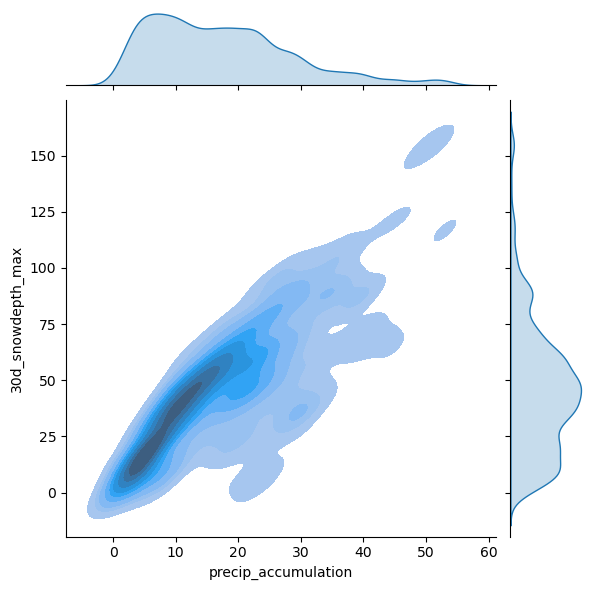

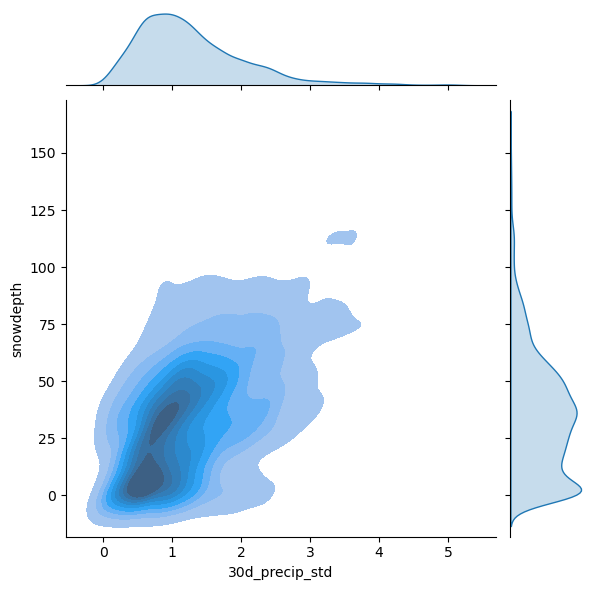

In [154]:
#Interaction of notable correlation Precipitation Accumulation vs 30d Snowdepth Max (0.82)	
#sns.jointplot(x='precip_accumulation', y='snowdepth', data=winter_data, kind='scatter', color='blue')
#plt.show()

# KDE example
sns.jointplot(x='precip_accumulation', y='30d_snowdepth_max', data=winter_data, kind='kde', fill=True)

#30d_precip_std at 0.620
sns.jointplot(x='30d_precip_std', y='snowdepth', data=winter_data, kind='kde', fill=True)

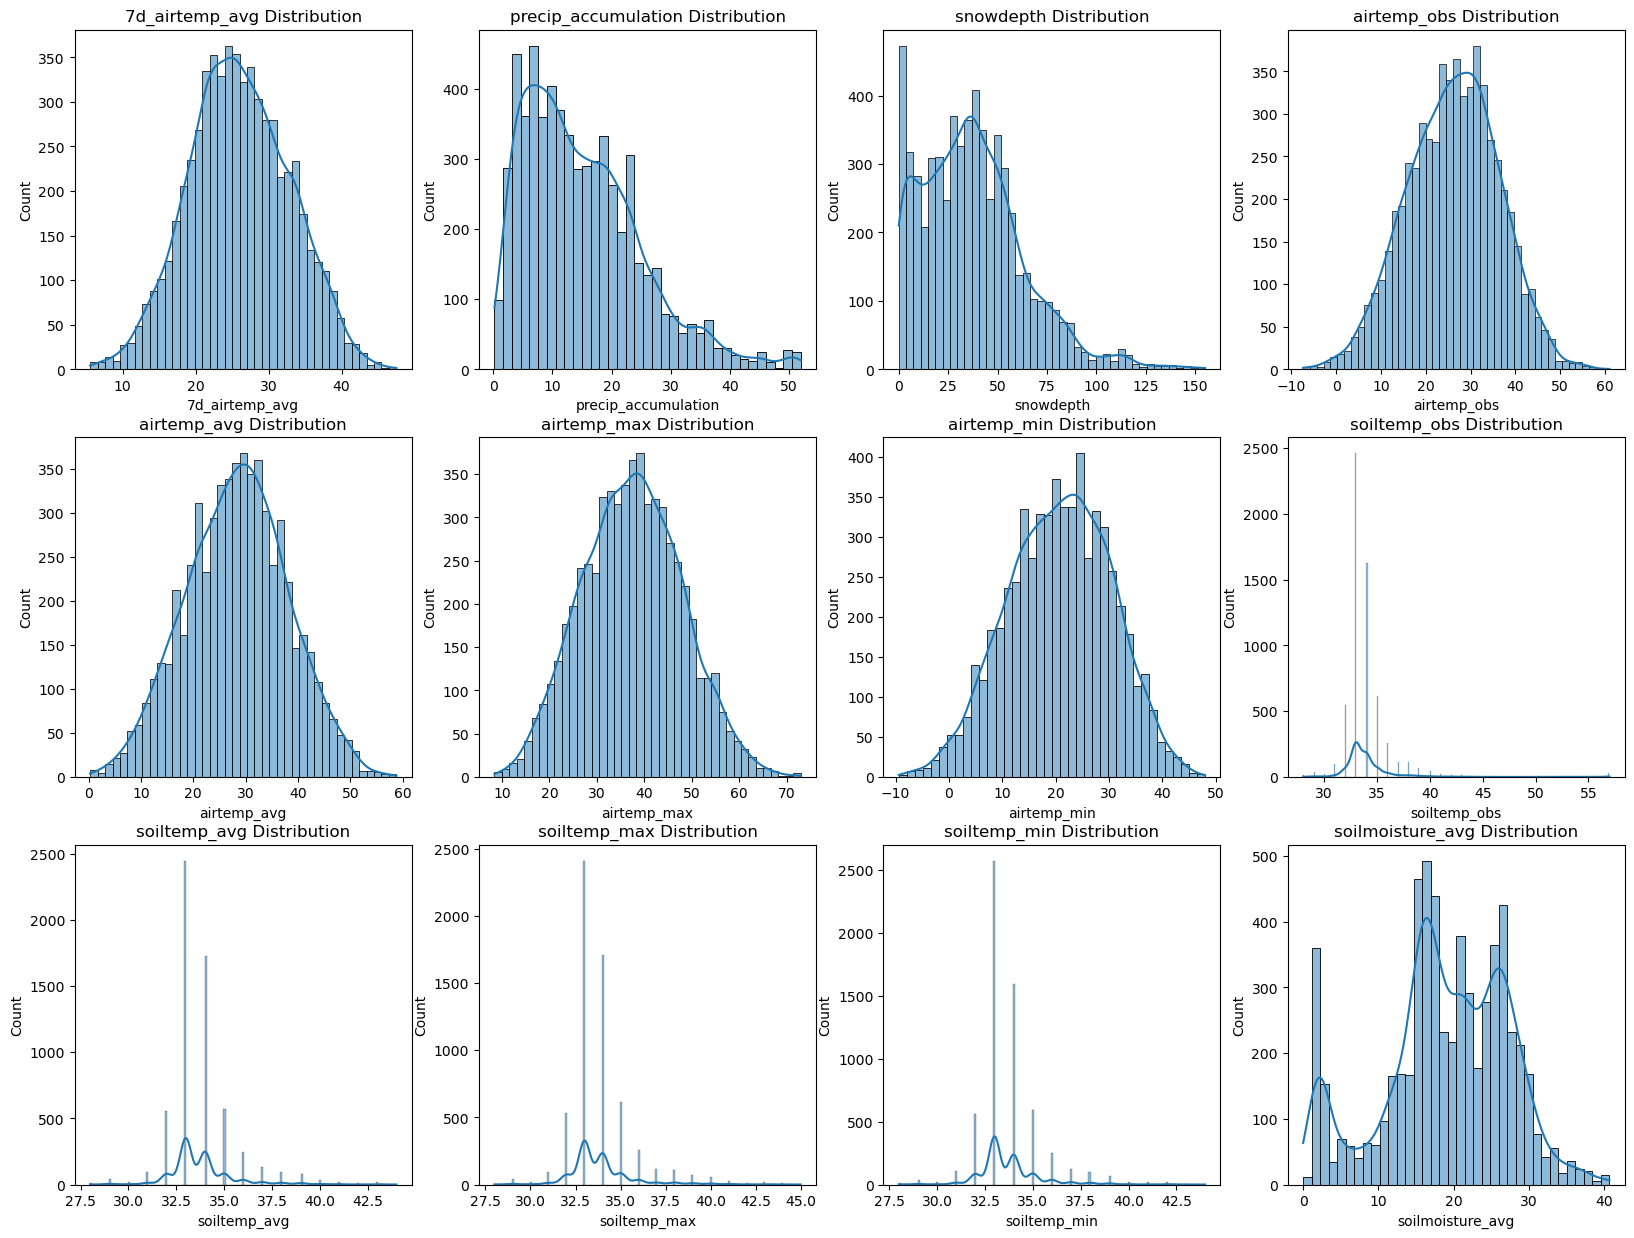

In [155]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
features = ['7d_airtemp_avg', 'precip_accumulation', 'snowdepth', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg']

for i, feature in enumerate(features):
    ax = axs[i // 4, i % 4]  # Calculate subplot location
    sns.histplot(winter_data[feature], ax=ax, kde=True)  
    ax.set_title(f'{feature} Distribution')

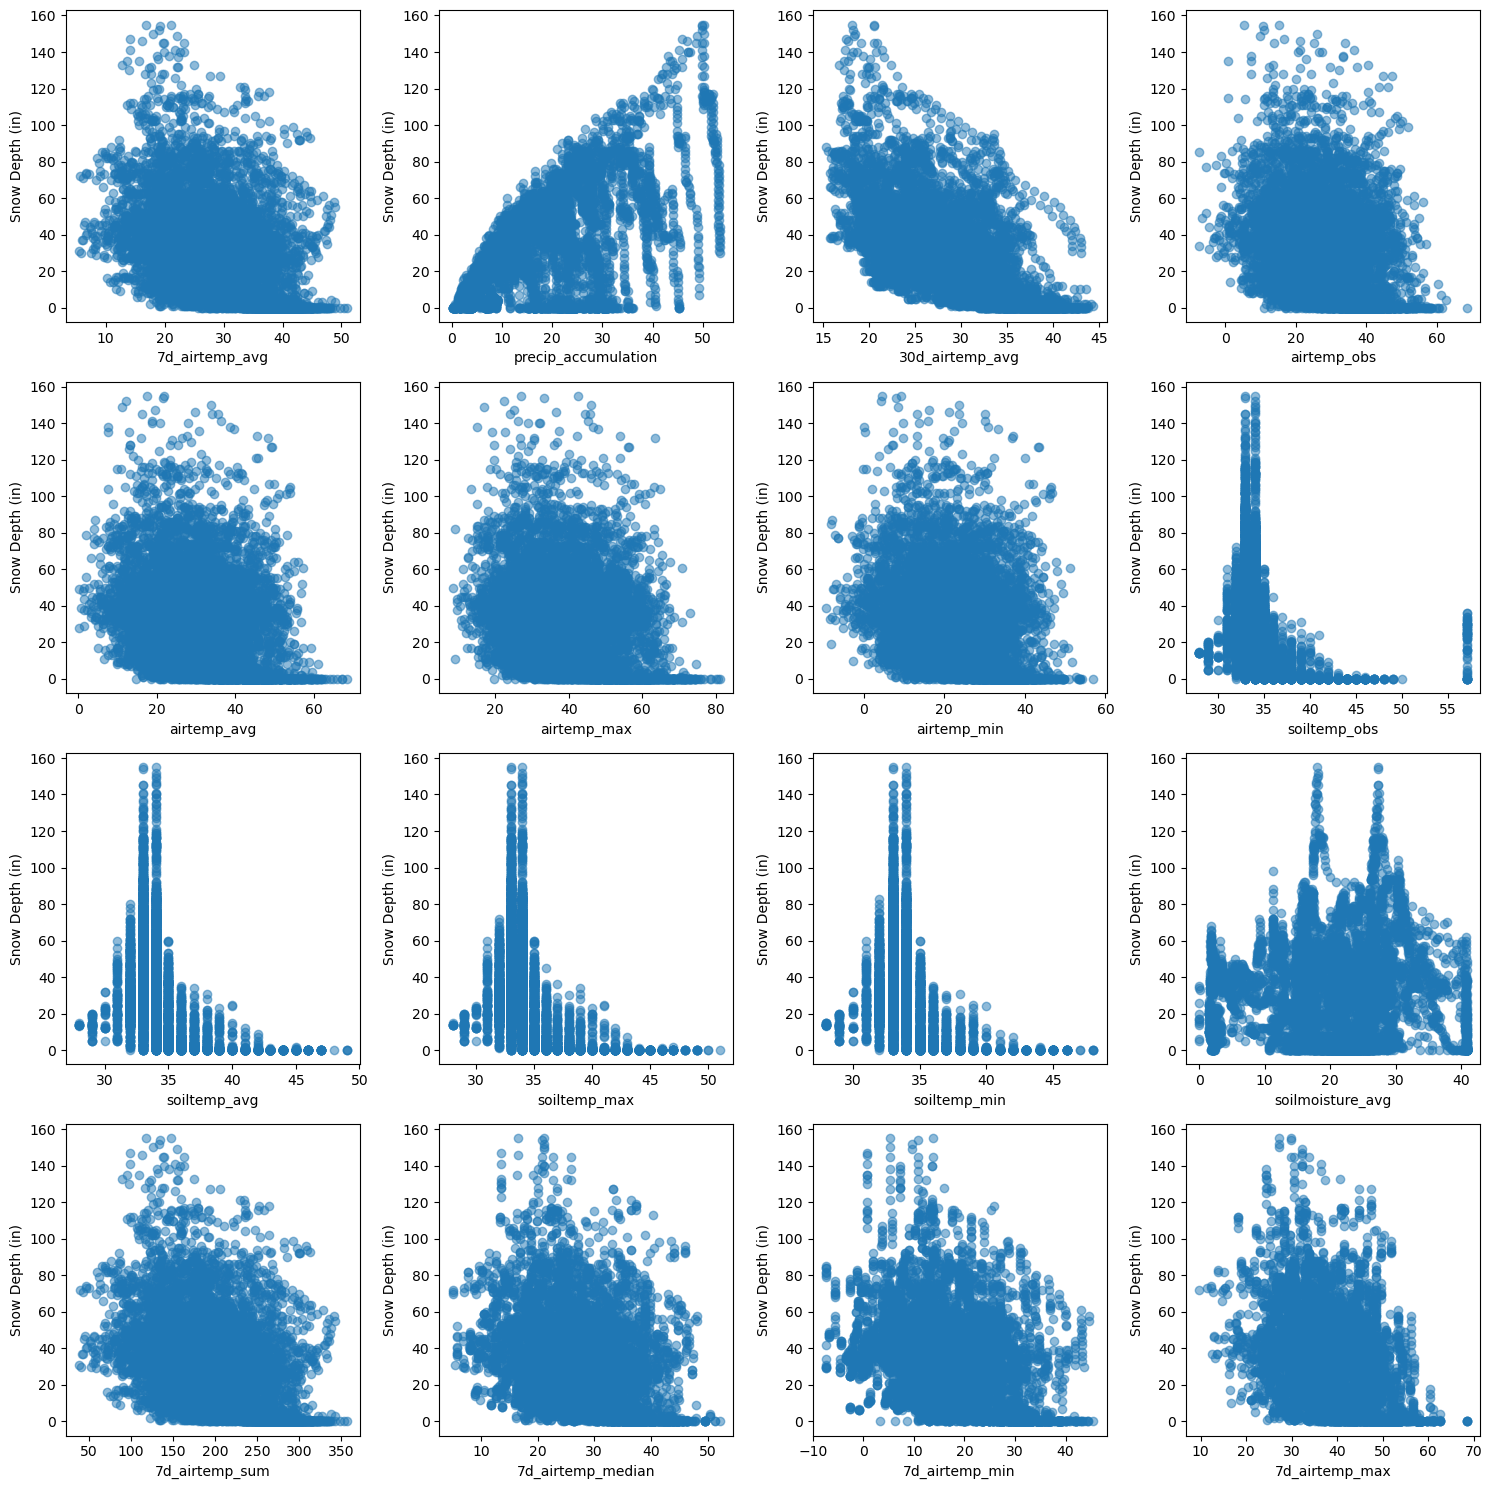

In [133]:
features = ['7d_airtemp_avg', 'precip_accumulation', '30d_airtemp_avg', 'airtemp_obs',
            'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs',
            'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg',
            '7d_airtemp_sum', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max']

def scatterplots(columns, ncol=4, figsize=(15, 15)):
    nrow = (len(columns) + ncol - 1) // ncol  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes for easier indexing

    for i, col in enumerate(columns):
        axes[i].scatter(winter_data[col], winter_data['snowdepth'], alpha=0.5)
        axes[i].set(xlabel=col, ylabel='Snow Depth (in)')
    
    # Turn off any extra blank subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    fig.tight_layout()
    plt.show()


scatterplots(features, ncol=4, figsize=(15, 15))


In [90]:
#Step 4: Exploring data across many dimensions
X= winter_data[['elevation', 'precip_accumulation', 'precip_increment', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg', '7d_airtemp_avg', '7d_airtemp_std', '7d_airtemp_var', '7d_airtemp_sum', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max', '30d_airtemp_avg', '30d_airtemp_std', '30d_airtemp_var', '30d_airtemp_sum', '30d_airtemp_median', '30d_airtemp_min', '30d_airtemp_max', 'month', 'year']]
y = winter_data['snowdepth']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model with all features
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))


R-squared: 0.8025546331030614
RMSE: 11.245586228247173


C:\DataScience\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


approximately 80% of the variation in snow depth is explained by the features in your model
RMSE of 11.24 suggests that, on average, the model's predictions are off by 11.79 cm of snow depth.

In [92]:
print(winter_data['snowdepth'].mean())

34.53049207906911


In [135]:
#Feature Selection Techniques: 
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)
print("Selected Features:", X_train.columns[rfe.support_])


Selected Features: Index(['precip_increment', 'soiltemp_avg', 'soiltemp_max', 'soiltemp_min',
       '30d_airtemp_max'],
      dtype='object')


In [ ]:
Precipitation Increment: Reflects that recent or short-term precipitation events could directly affect snow accumulation or melting.
Soil tempature Max: Maximum soil temperature indicates how warm the ground can get which directly impacts snowmelt 
    A higher maximum temperature likely accelerates snowpack reduction, making this feature highly relevant for snow depth
Precipitation dynamics and ground heat flux ? 

In [137]:
#Principal Compoenent Analysis (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_train)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.93314903 0.05960064 0.00338739 0.00202374 0.0010151 ]


First Principal Component (PC1):

Explains 93.31% of the variance in the data.

This means the majority of the information or variability in your dataset can be captured by this single component.

Second Principal Component (PC2):

Explains 5.96% of the variance.

While this component contributes less information, it might still capture meaningful variability that the first component misses.

In [121]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_
for i, v in enumerate(importance):
    print(f"Feature: {X_train.columns[i]}, Importance: {v}")


Feature: elevation, Importance: 0.0053259938978573946
Feature: precip_accumulation, Importance: 0.35317020337810606
Feature: precip_increment, Importance: 0.0006232631774543945
Feature: airtemp_obs, Importance: 0.0017698684033535174
Feature: airtemp_avg, Importance: 0.002105363735007206
Feature: airtemp_max, Importance: 0.0019885449471932935
Feature: airtemp_min, Importance: 0.0016713383538025546
Feature: soiltemp_obs, Importance: 0.0037517588643999236
Feature: soiltemp_avg, Importance: 0.0011695379652046512
Feature: soiltemp_max, Importance: 0.005225231324166619
Feature: soiltemp_min, Importance: 0.0019506527745568087
Feature: soilmoisture_avg, Importance: 0.012239635047713228
Feature: 7d_airtemp_avg, Importance: 0.002270742424664321
Feature: 7d_airtemp_std, Importance: 0.0008553706046467458
Feature: 7d_airtemp_var, Importance: 0.0008830671006569254
Feature: 7d_airtemp_sum, Importance: 0.0020333949453036587
Feature: 7d_airtemp_median, Importance: 0.0035746311226587477
Feature: 7d_airt

Highly Important Features:
month (0.389): It suggests that the month strongly influences the target variable (e.g., snow depth), likely due to seasonal effects.

precip_accumulation (0.353):The amount of accumulated precipitation significantly impacts the target variable. This aligns with how precipitation directly contributes to snowpack.

30d_airtemp_max (0.071) and 30d_airtemp_median (0.061): These 30-day air temperature metrics are key for understanding snow accumulation and melting patterns. Maximum and median temperatures likely influence snowmelt rates.

Moderately Important Features: 
30d_airtemp_avg (0.017) and 30d_airtemp_sum (0.017):These features summarize broader air temperature trends and help capture sustained effects over time.

30d_airtemp_min (0.013) and soilmoisture_avg (0.012): Minimum air temperatures are crucial for determining whether precipitation falls as snow or rain.
Soil moisture might reflect conditions influencing snow retention or melting.

year (0.016): While less critical than monthly trends, the year feature may capture long-term patterns or climatic shifts.

Less Important Features:
elevation (0.005) and soiltemp_max (0.005): While elevation influences snowfall and temperature distribution, its low importance here may indicate limited variability in the dataset.Maximum soil temperatures have a mild effect, likely related to snowmelt.

Other Soil/Air Temperature Variables: Features like airtemp_obs (0.0017) and soiltemp_avg (0.0011) contribute less to predictions, suggesting they are secondary effects compared to broader temperature metrics like 30d_airtemp_max.

precip_increment (0.0006): Short-term precipitation changes have minimal impact here, compared to cumulative precipitation.



Model relies most heavily on temporal features (month, precip_accumulation, 30d_airtemp_max), reflecting the importance of seasonality.
Consider eliminating features with very low importance (e.g., precip_increment, soiltemp_avg) to reduce complexity.

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


C:\DataScience\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


               Features           VIF
0             elevation  1.620766e+02
1   precip_accumulation  6.869615e+00
2      precip_increment  1.523690e+00
3           airtemp_obs  4.349831e+01
4           airtemp_avg  4.326356e+02
5           airtemp_max  2.372085e+02
6           airtemp_min  8.893559e+01
7          soiltemp_obs  2.703975e+02
8          soiltemp_avg  3.112371e+04
9          soiltemp_max  1.135417e+04
10         soiltemp_min  1.623664e+04
11     soilmoisture_avg  9.959945e+00
12       7d_airtemp_avg           inf
13       7d_airtemp_std  3.748919e+02
14       7d_airtemp_var  7.621579e+01
15       7d_airtemp_sum           inf
16    7d_airtemp_median  2.895241e+02
17       7d_airtemp_min  1.605659e+02
18       7d_airtemp_max  5.753105e+02
19      30d_airtemp_avg           inf
20      30d_airtemp_std  3.305380e+03
21      30d_airtemp_var  8.203211e+02
22      30d_airtemp_sum           inf
23   30d_airtemp_median  6.228467e+02
24      30d_airtemp_min  2.048777e+01
25      30d_

Highlight issues with multicollinearity
High IVF
Features with extremely high VIF values, like soiltemp_avg (31,123.71), soiltemp_max (11,354.17), and others marked as inf, indicate severe multicollinearity, likely because these features are strongly correlated with other features or themselves.

7d_airtemp_avg, 7d_airtemp_sum, 30d_airtemp_avg, and 30d_airtemp_sum being inf suggests perfect or near-perfect linear relationships between these variables and others.

Moderate VIF: 
Features like elevation (162.08) and airtemp_max (237.21) have high but not extreme VIFs. These might still need to be examined for redundancy.

Low VIF: 
Features like precip_increment (1.52) and month (4.99) are well within an acceptable range, indicating little to no multicollinearity.


Feature removal plan 
-Retain precip_increment, soiltemp_avg, 30d_airtemp_max, and month (all critical based on RFE or low VIF).
-Drop soiltemp_min and soiltemp_max to resolve redundancy with soiltemp_avg.
-Remove or consolidate 7-day and 30-day air temperature features with the highest VIFs (inf), retaining only those selected by RFE or essential for domain relevance.

Text(0.5, 1.0, 'Correlation Heatmap of Air Temperature Features')

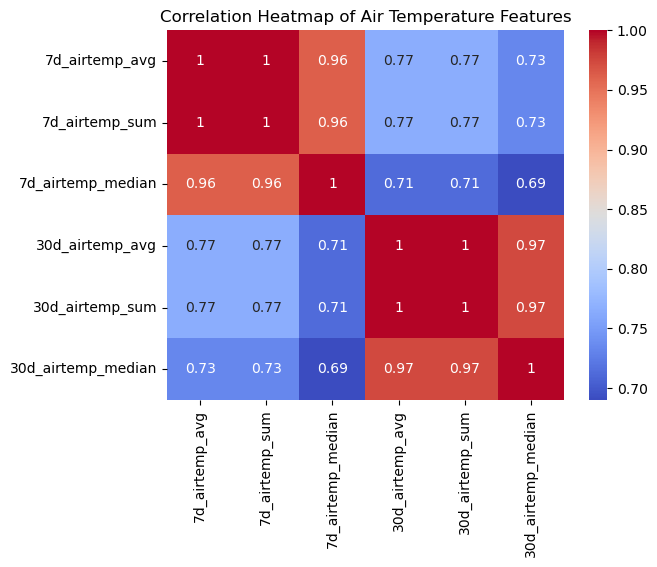

In [146]:
#Exploring the correlation between 7d vs 30d air temp windows

corr_matrix = X_train[['7d_airtemp_avg', '7d_airtemp_sum', '7d_airtemp_median',
                       '30d_airtemp_avg', '30d_airtemp_sum', '30d_airtemp_median']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Air Temperature Features')

In [152]:
#Testing the model without soiltemp_min, soiltemp_max, 7d_airtemp_sum, 30d_airtemp_sum, 
X= winter_data[['elevation', 'precip_accumulation', 'precip_increment', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soilmoisture_avg', '7d_airtemp_avg', '7d_airtemp_std', '7d_airtemp_var', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max', '30d_airtemp_avg', '30d_airtemp_std', '30d_airtemp_var', '30d_airtemp_sum', '30d_airtemp_median', '30d_airtemp_min', '30d_airtemp_max', 'month', 'year']]
y = winter_data['snowdepth']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model with all features
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))

from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Use the dedicated function for RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)


R-squared: 0.794348417466029
Root Mean Squared Error: 11.476901496548388


In [43]:
import os

datapath = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data'
snow_data_eda = 'snow_data_cleaned.csv'
filepath = os.path.join(datapath, snow_data_eda)


snow_data.to_csv(filepath, index=False)
print(f"Data saved successfully to '{filepath}'")


Data saved successfully to 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data\snow_data_cleaned.csv'
